In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-clustering/segmentation data.csv
/kaggle/input/customer-clustering/segmentation data legend.xlsx


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#000000;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 20px;
              color:white;">
              Basic Information About Dataset and Values

</p>
</div>



### **About Dataset :**
Customer Segmentation is the subdivision of a market into discrete customer groups that share similar characteristics. Customer Segmentation can be a powerful means to identify unsatisfied customer needs. Using the above data companies can then outperform the competition by developing uniquely appealing products and services.
You are owing a supermarket mall and through membership cards, you have some basic data about your customers like Customer ID, age, gender, annual income and spending score. You want to understand the customers like who are the target customers so that the sense can be given to marketing team and plan the strategy accordingly.

### **Dataset Summary :**
1. we are owner of supermarket mall
2. we have data of our customers containing columns like age,gender,annual income, etc.

### **Goal :**
1. Find Target Customers
2. Summary of requirements of Target Customers

### Raw Thinking
1. My goal is to find the customers that help me to gain lot of profits 
2. This profit depends on various parameters such as which age group fetches me max profit 
3. Then from which cities those customer come
4. What is their gender
5. Also what is their marital status 
6. what are the expectations of customer 
7. what attracts him/her to my supermarket
8. what occupation they do 
9. which income group people are required to be attracted
10. what are the best parameter combinations such as income grp with respect to cities

*Note : Above is my RAW/RANDOM thinking or you can say just for my information😉*

### **Information of values contained in columns**
1. Sex (Gender) : 0 : Female 1: Male
2. Marital Status :  0: Single, 1: Non-single (divorced/separated/married/widowed)
3. Age : Age of Customers
4. Education : 0 : Others , 1 : Under Graduates , 2 : Post Graduates
5. Income : Customer Income 
6. Occupation : 0 : Unemployed, 1 : Employed , 2 : Highly Employed
7. Settlement Size (Size of Cities the customer lives): 0 : Small City , 1 : Med Size City , 2 : Large Cities 

# Lets Begin

In [2]:
# basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# graph
import plotly.graph_objects as go
import plotly.express as px

#scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#model
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Data Exploration

In [3]:
# fetch data
data = pd.read_csv("/kaggle/input/customer-clustering/segmentation data.csv")
data.head(4)

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1


In [4]:
data.shape

(2000, 8)

In [5]:
data.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


**Description**
* ID column is of no use
* Sex column contains maximum 1: Male 
* Martial Status contains maximum 1: (married/divorced/separated/widowed)
* Age is maximum 76 and min is 18
* Customers having Education 3 : Post Graduates are higher in count
* Income is in between range of [35832 to 309364]
* Occupation 2 : Highly Qualified
* Settlement Size : 2 : Big City

In [6]:
data.dtypes

ID                 int64
Sex                int64
Marital status     int64
Age                int64
Education          int64
Income             int64
Occupation         int64
Settlement size    int64
dtype: object

* All data-types are INT so need of any conversion like object to INT etc.

In [7]:
data.isnull().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

* Cleaned data no NULL values

**Lets Divide the Columns into Continous and Categorical ✅**

* **Columns with Continous Values :**
1. Age
2. Income 
* **Columns with Categorical Values :**
1. Sex
2. Marital Status
3. Education
4. Occupation
5. Settlement Size

In [8]:
# renaming the column settlement to city size
data = data.rename(columns = {"Settlement size" : "city size"})
data.head(4)

,ID,Sex,Marital status,Age,Education,Income,Occupation,city size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1


In [9]:
visual = pd.read_csv("/kaggle/input/customer-clustering/segmentation data.csv")
visual.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


This visual dataframe will be used in ploting histograms with respect to clusters!

# EDA (Exploratory Data Analysis)

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#000000;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 15px;
              color:white;">
              Lets map all the categorical values with repect to their number in different columns

</p>
</div>



In [10]:
# function for mapping
def map_values(data_map):
    data_map = data_map.copy()
    # sex
    data_map['Sex'] = data_map['Sex'].replace(0,'Male')
    data_map['Sex'] = data_map['Sex'].replace(1,'Female')
    # martial status
    data_map['Marital status'] = data_map['Marital status'].replace(0,'Single')
    data_map['Marital status'] = data_map['Marital status'].replace(1,'Non-single')
    # Education
    data_map['Education'] = data_map['Education'].replace(0,'Others')
    data_map['Education'] = data_map['Education'].replace(1,'High School')
    data_map['Education'] = data_map['Education'].replace(2,'University')
    data_map['Education'] = data_map['Education'].replace(3,'Post Graduate')

    # Occupation
    data_map['Occupation'] = data_map['Occupation'].replace(0,'Unemployed')
    data_map['Occupation'] = data_map['Occupation'].replace(1,'Employed')
    data_map['Occupation'] = data_map['Occupation'].replace(2,'Highly Employed')
    # City size
    data_map['city size'] = data_map['city size'].replace(0,'Small City')
    data_map['city size'] = data_map['city size'].replace(1,'Med City')
    data_map['city size'] = data_map['city size'].replace(2,'Large City')
    
    return data_map


data_map = map_values(data)
data_map.head(4)

,ID,Sex,Marital status,Age,Education,Income,Occupation,city size
0,100000001,Male,Single,67,University,124670,Employed,Large City
1,100000002,Female,Non-single,22,High School,150773,Employed,Large City
2,100000003,Male,Single,49,High School,89210,Unemployed,Small City
3,100000004,Male,Single,45,High School,171565,Employed,Med City


In [11]:
data.head(4)

,ID,Sex,Marital status,Age,Education,Income,Occupation,city size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#000000;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 15px;
              color:white;">
               Category Wise Analysis

</p>
</div>



* Sex V/s Age
* Sex V/s Income
* Sex V/s City Size
* Sex V/s Education and Occupation

In [12]:
# With respect to age
def make_hist_sex(column_name):
    fig = go.Figure()

    fig.add_trace(go.Histogram(x=data_map[column_name][data_map['Sex'] == "Female"], name='Female', histfunc='count', marker_color='black'))
    fig.add_trace(go.Histogram(x=data_map[column_name][data_map['Sex'] == 'Male'], name='Male', histfunc='count', marker_color='red'))

    fig.update_layout(barmode='group', xaxis_title=column_name, yaxis_title='Count', title=f'{column_name} Distribution by Sex')

    return fig.show()

In [13]:
make_hist_sex("Age")

* Number of females are higher in age **group 26 to 27** and Number of males are higher in age **group 36 to 37** as compared to both categories

In [14]:
make_hist_sex("Income")

* Number of females are higher in Income Range **[105k to 110k]** whereas for males it is between **[120k to 125k]**

In [15]:
make_hist_sex("city size")

* Large number of **females are from Small City** and Ratio of Number of males compared all cities are nearly equal

In [16]:
make_hist_sex("Education")

* Most of **males and females have High School Education** and then 2nd top is University level Education

In [17]:
make_hist_sex("Occupation")

* **Most** of Males and Females are Employed but also **count of Females in Umemployment is Larger**

**Short-Insights**
1. High Number of male and female are between age group 20 to 40 approx
2. Number of females are higher in Income Range [105k to 110k] whereas for males it is between [120k to 125k]
3. City Size : Small City
4. Education : High School
5. Occupation : Employed

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#000000;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 15px;
              color:white;">
               Some Straight Combination of Columns
</p>

<style>
    div:hover p {
        color: #your-hover-color;
    }
</style>
</div>


* Income V/s City
* Income V/s Occupation
* Income V/s Education

In [18]:

def create_income_hist(column_name):
    # Filter the data for the selected column value (city size in this case)
    data_to_plot = data_map[data_map[column_name].notna()]

    # Create a histogram
    fig = px.histogram(data_to_plot, x='Income', color=column_name, histfunc='count', nbins=10, title=f'{column_name} Distribution by Income')
    
    # Update the layout
    fig.update_layout(xaxis_title='Income', yaxis_title='Count')

    # Show the plot
    fig.show()

create_income_hist('city size')

* Large City, Med City, Small City Average Income is between 100k to 150k : **Small City > Med City > Large City**
* **Income Range [250k to 300k]** : Large City Customers > Med City Customers 
* **Income Range [150k to 200k]** : Med City Customers > Large City Customers

In [19]:
create_income_hist("Occupation")

* Above graph pop ups a question : What is the distribution of Occupation With Respect to City size?
* **837(Employed)+66(Highly Employed)** customers earns between 100k to 150k

In [20]:
def create_stacked_bar_chart(data, x_column, y_column, title, color_discrete_sequence=None):
    fig = px.bar(data, x=x_column, color=y_column, title=title, color_discrete_sequence=color_discrete_sequence)
    
    fig.show()
    
custom_colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"]  # Custom color sequence

create_stacked_bar_chart(data_map, "Occupation", "city size", "Occupation V/s City Size", color_discrete_sequence=custom_colors)


* Number of **Highly Employed** live in Large and Med size cities
* Large Number of **Unemployed customers** live in small city
* All three categories of cities(customer count) are around equal in number of customers who are **Employed**!

**Hence I think its enough of Analysis lets plots some common graphs and move towards model building**

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



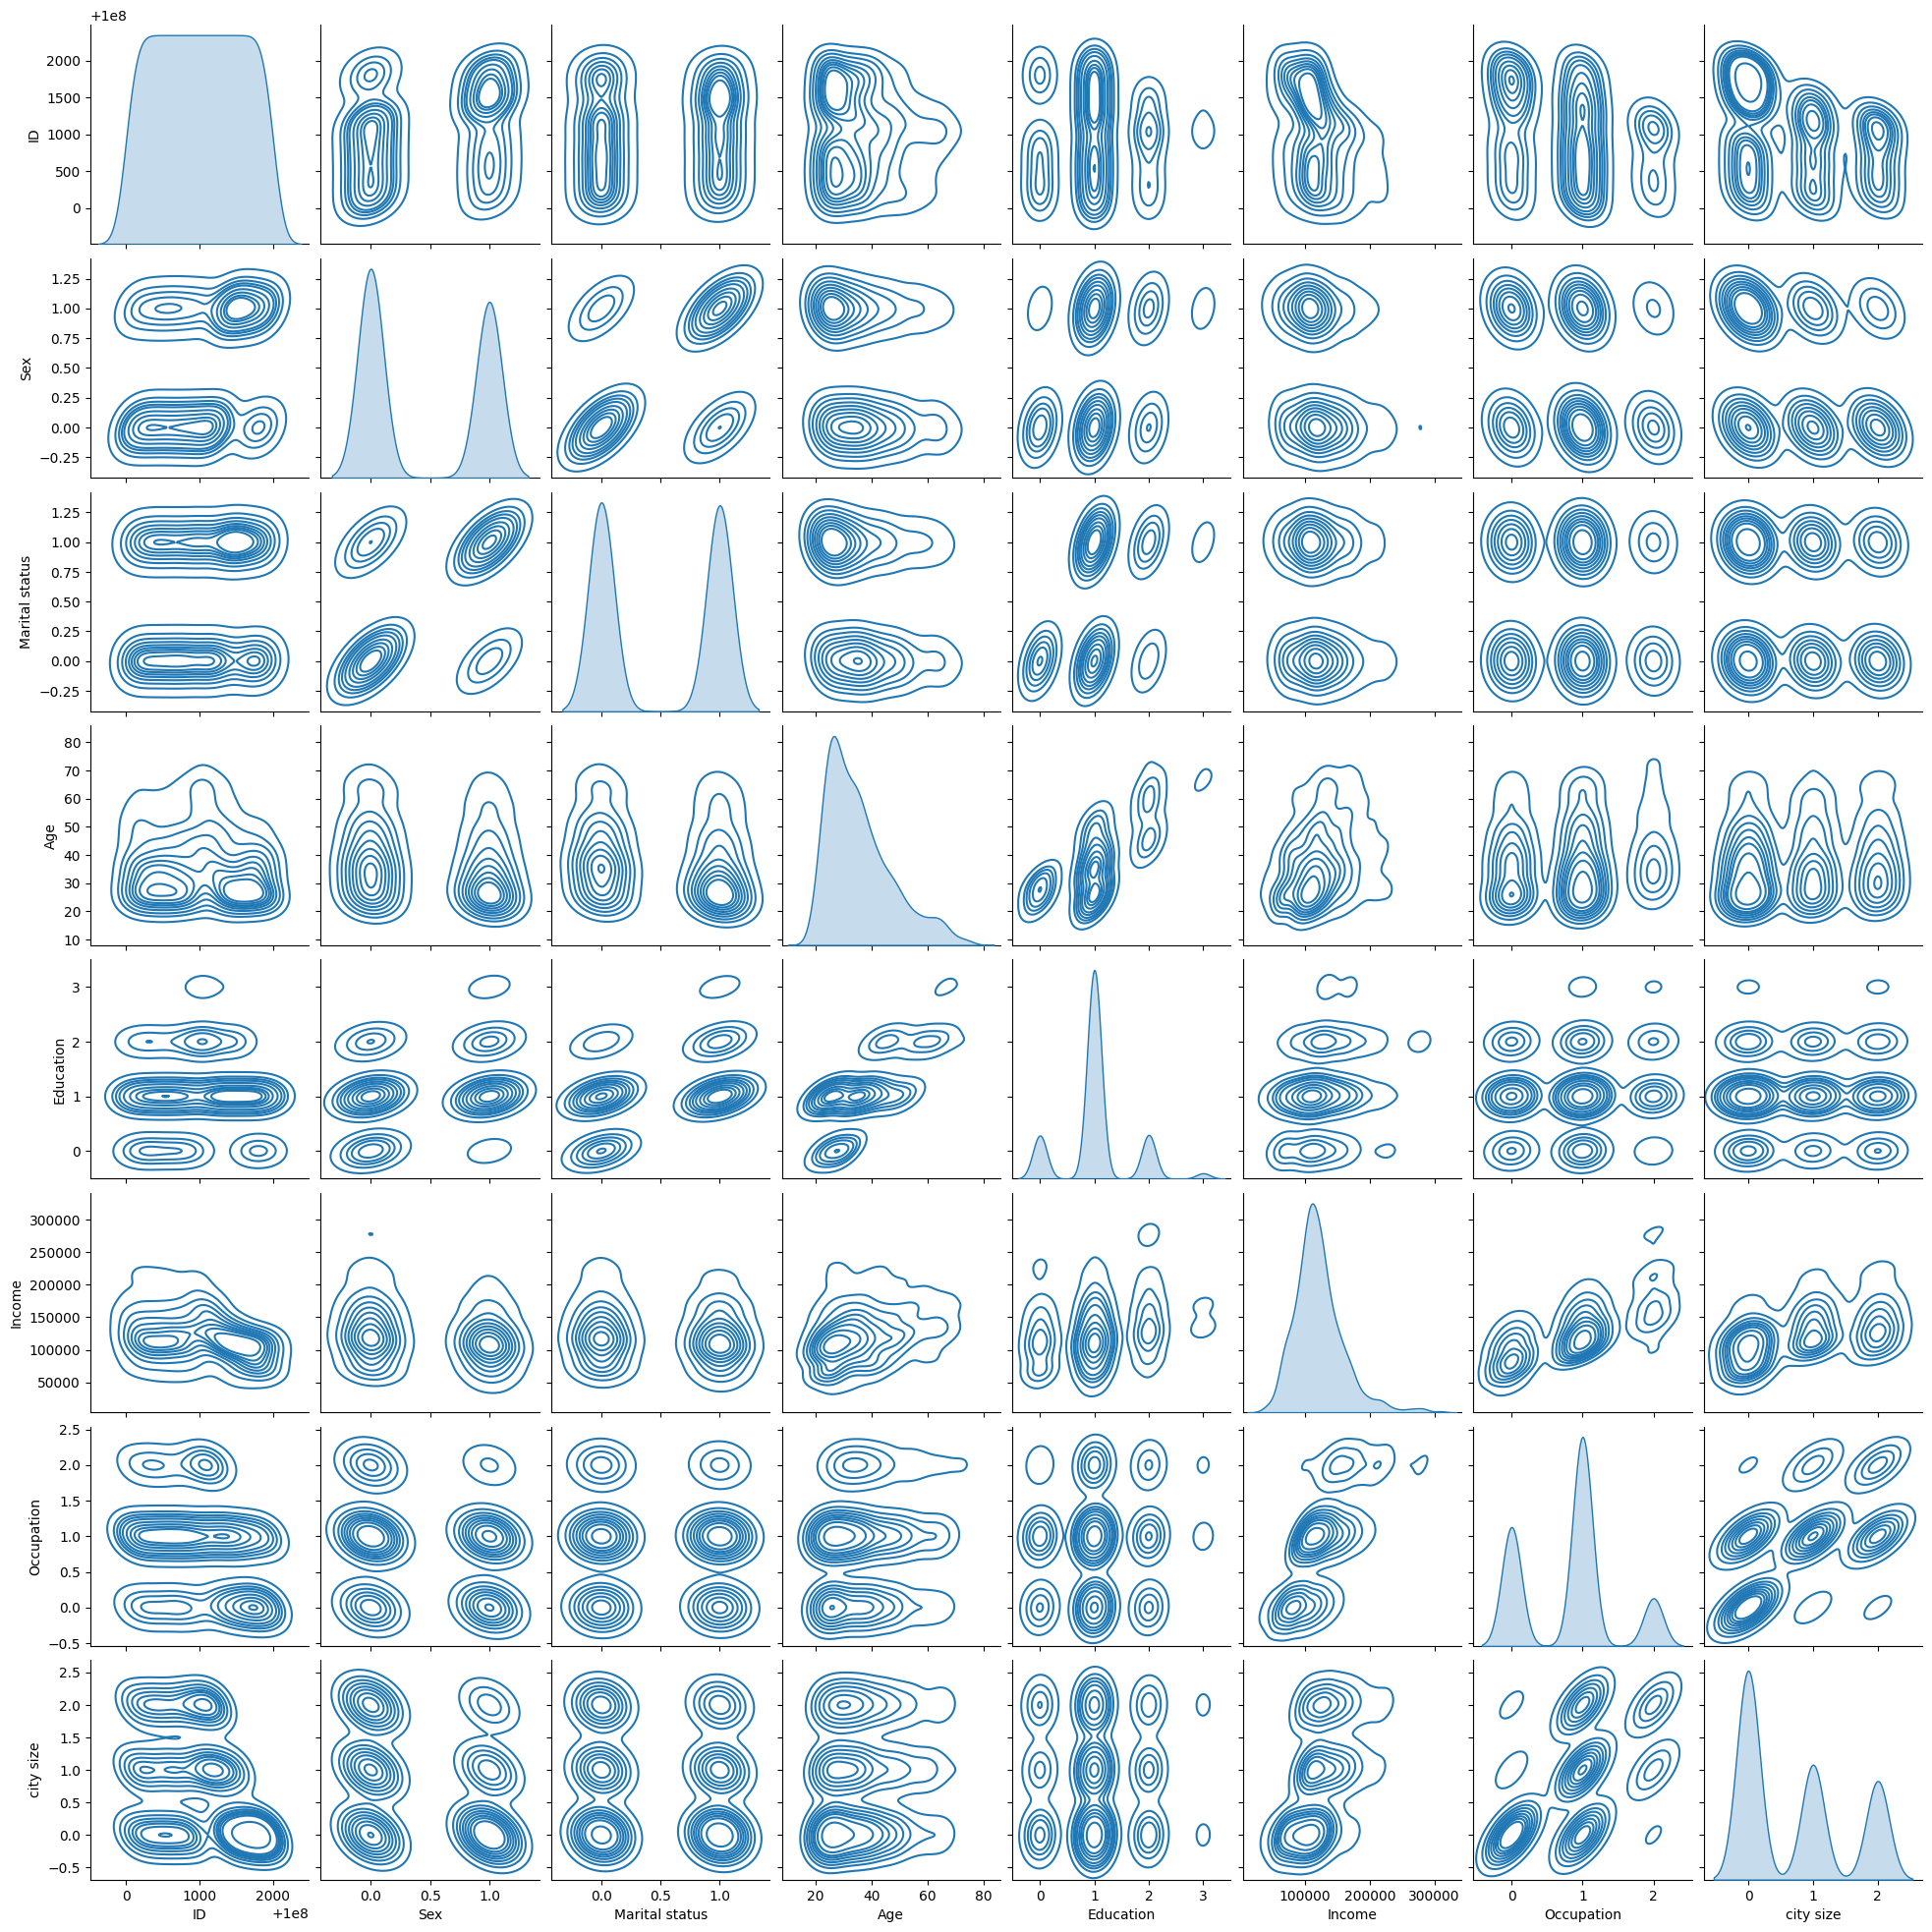

In [21]:
sns.pairplot(data,kind="kde")

# Clustering

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#000000;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
               Using Hierarchical Clustering 

</p>
</div>



**Hierarchical Clustering :** It is another unsupervised machine learing algorithm used to group unlabelled data and it is also know as HCA(Hierarchical Clustering Analysis)

**Two Approaches :**
1. **Agglomerative Clustering** : Bottom up approach where algorithm start taking all data points and merging them into same clusters
2. **Divisive** : Top down approach. Its like starting with a Big group of things and split them repeatedly it into smaller groups untile we have individual items
**Steps :**
1. Data Preparation
2. Scaling (1. standardization or 2. min-max scaling)
3. Finding optimal number of clusters using **Dendrograms**
4. draw graphs
5. Metric Evaluation

In [22]:
# standard scaling : Applied to Only Columns having Continous values
def standard_scale(data, continuous_columns):
    scaler = StandardScaler()
    data[continuous_columns] = scaler.fit_transform(data[continuous_columns])

continuous_columns_to_scale = ["Age", "Income"]
standard_scale(data, continuous_columns_to_scale)

In [23]:
final_data = data.drop(columns = ['ID','Sex','Marital status','Education','Occupation','city size'])
final_data.head()

,Age,Income
0,2.653614,0.097524
1,-1.187132,0.782654
2,1.117316,-0.833202
3,0.775916,1.328386
4,1.458716,0.736932


**Completed Step 1 & Step 2**

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#000000;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 15px;
              color:white;">
               Agglomerative Hierarchical Clustering & Linkage Methods

</p>
</div>



**Linkage :**  Linkage refers to the method used to measure the distance between clusters when merging or agglomerating them. 

**Linkage Methods :**
1. Single Linkage : Shortest Distance between closest point of clusters
2. Complete Linkage : Farthest Distance between the two points of two different clusters which forms tighter clusters
3. Average Linkage : It is a method that calculates the distance between two clusters as the average distance between all pairs of data points
4. Centroid Linkage : Distance between the centroid of the clusters is calculated.

In [24]:
# ward method is most common method which Minimizes the variance withing resulting clusters!

linkage_matrix = linkage(final_data,method='ward')

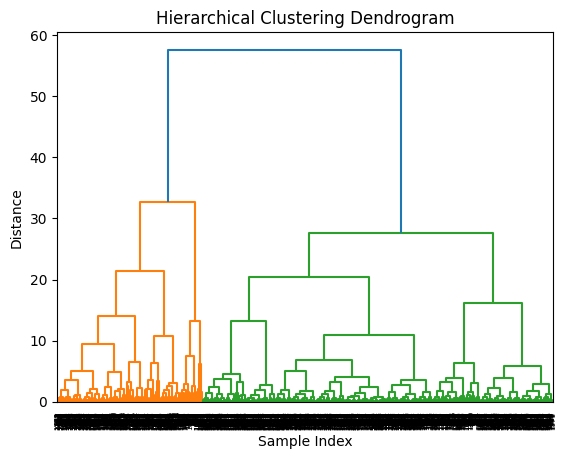

In [25]:
# dendrogram : Finds optimal number of clusters : The maximum vertical lines that dont get crossed by horizontal line
dendrogram(linkage_matrix, labels=final_data.index, orientation='top', distance_sort='descending')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

**Optimal Clusters : 6**

In [26]:
# Train the clustering model
hc = AgglomerativeClustering(n_clusters=6,metric='euclidean',linkage='ward')
y_pred= hc.fit_predict(final_data) 

**y_pred** will contain all the clusters with their numbers

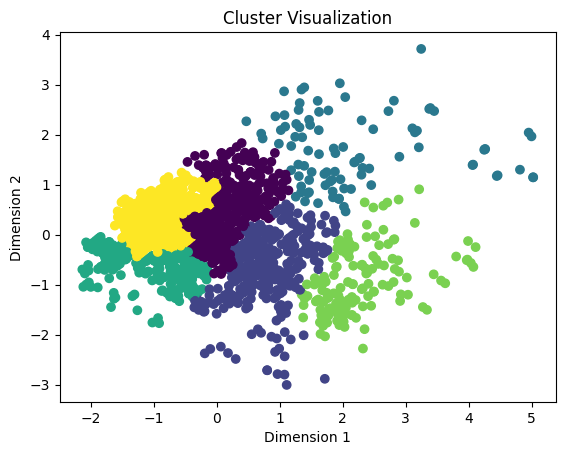

In [27]:
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
reduced_data = pca.fit_transform(final_data)

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=y_pred, cmap='viridis')
plt.title('Cluster Visualization')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

Lets try to visualize this cluster using scatter_3d plot

In [28]:
# 3D Cluster Plot
reduced_data = pd.DataFrame(reduced_data, columns=['Dimension 1', 'Dimension 2'])
reduced_data['Cluster'] = y_pred
# reduced_data contains columns -> Dimension 1 Dimension 2 Cluster which maps each dimension with cluster
fig = px.scatter_3d(reduced_data, x='Dimension 1', y='Dimension 2', z='Cluster', color='Cluster', labels={'Cluster': 'Cluster'})
fig.update_layout(scene=dict(xaxis_title='Dimension 1', yaxis_title='Dimension 2', zaxis_title='Cluster'))
fig.update_traces(marker=dict(size=4))
fig.show()


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#000000;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 15px;
              color:white;">
               Plots and Summary of Clusters

</p>
</div>



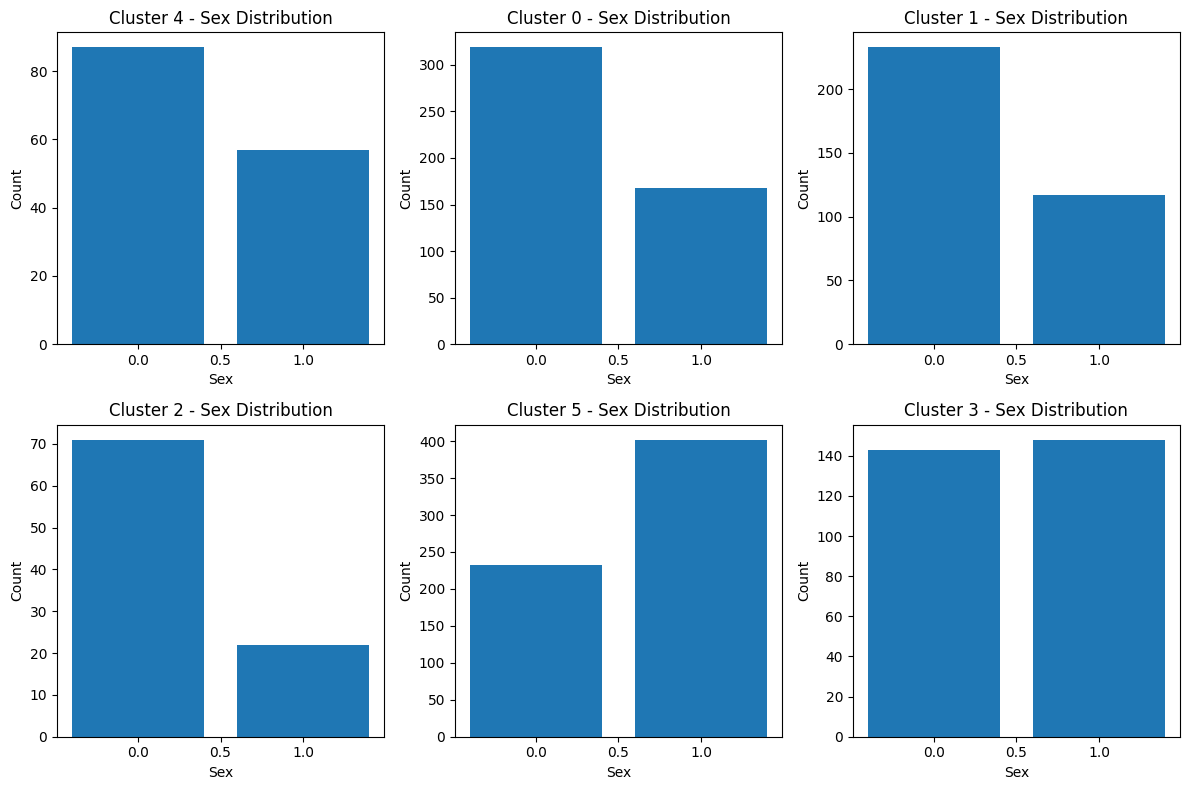

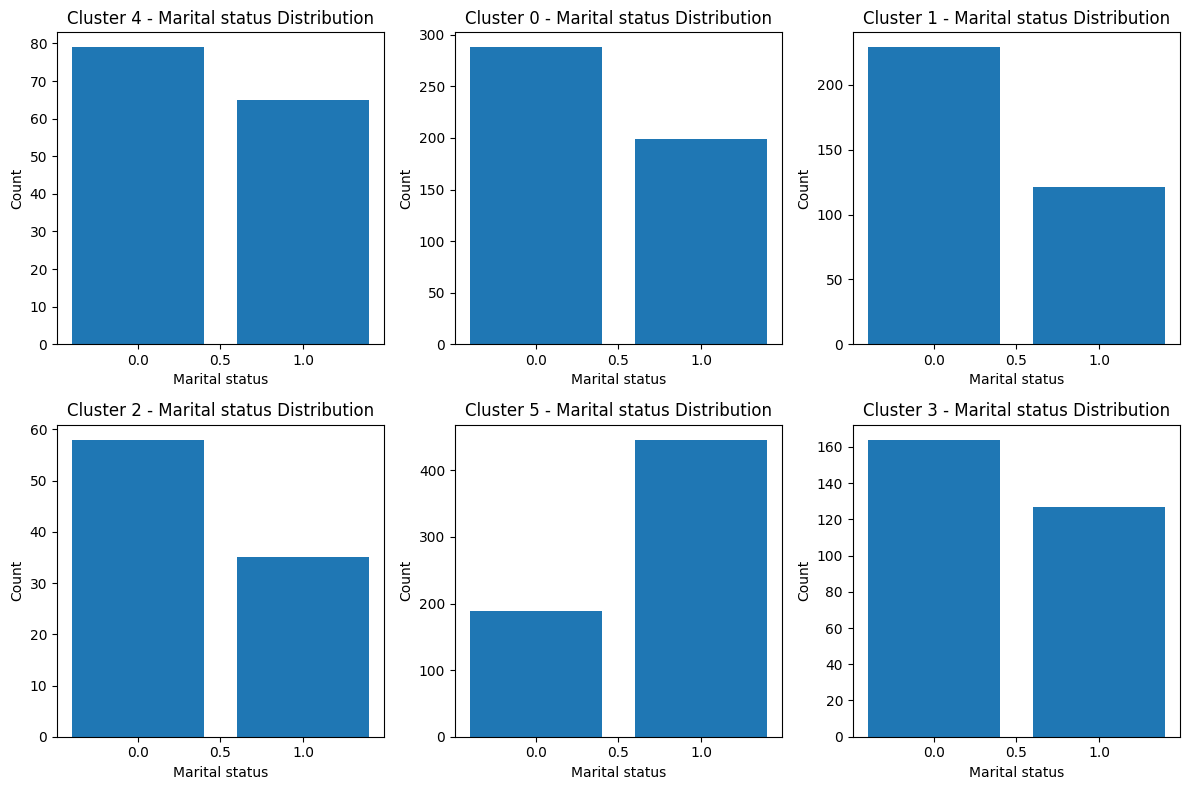

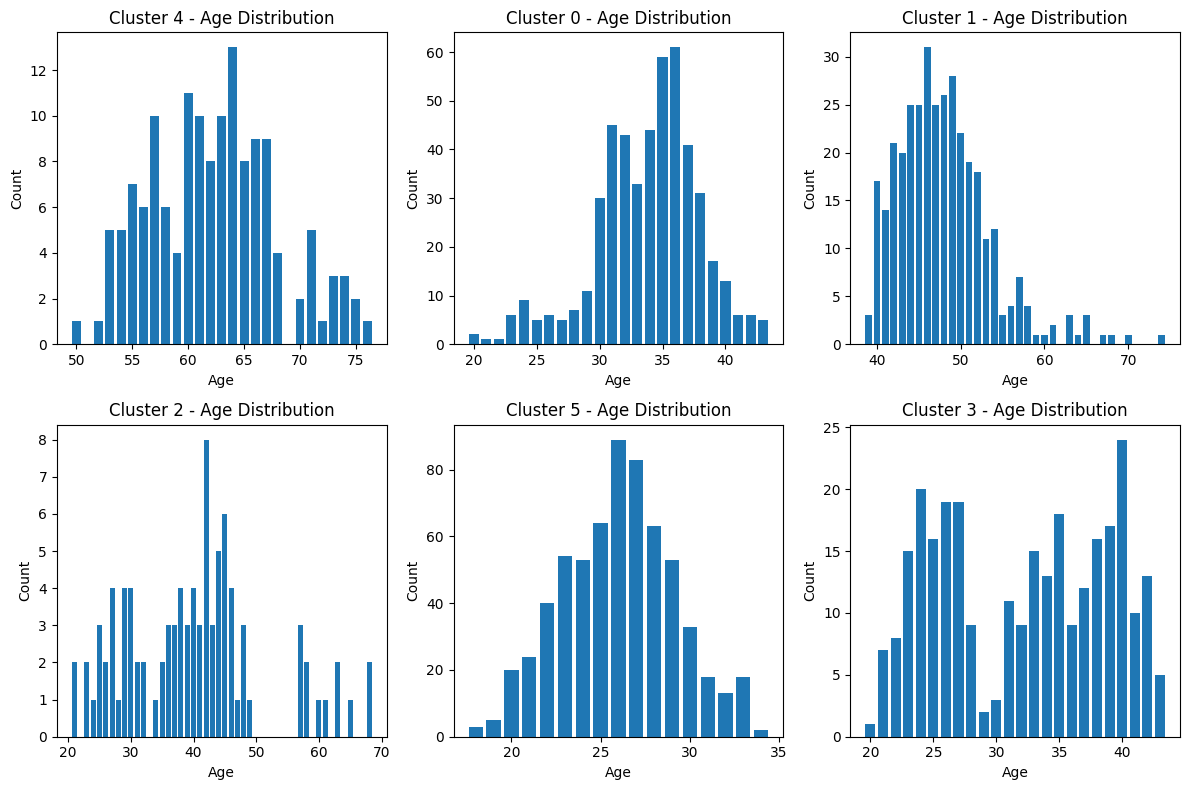

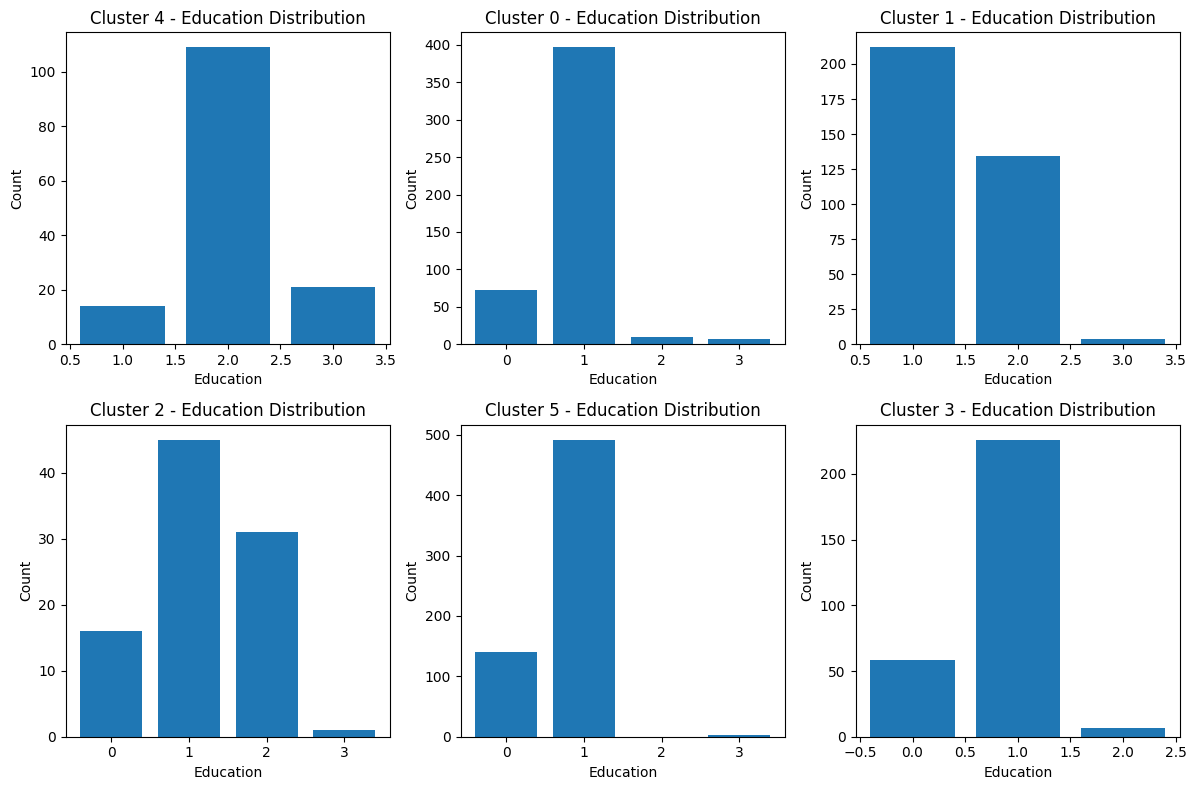

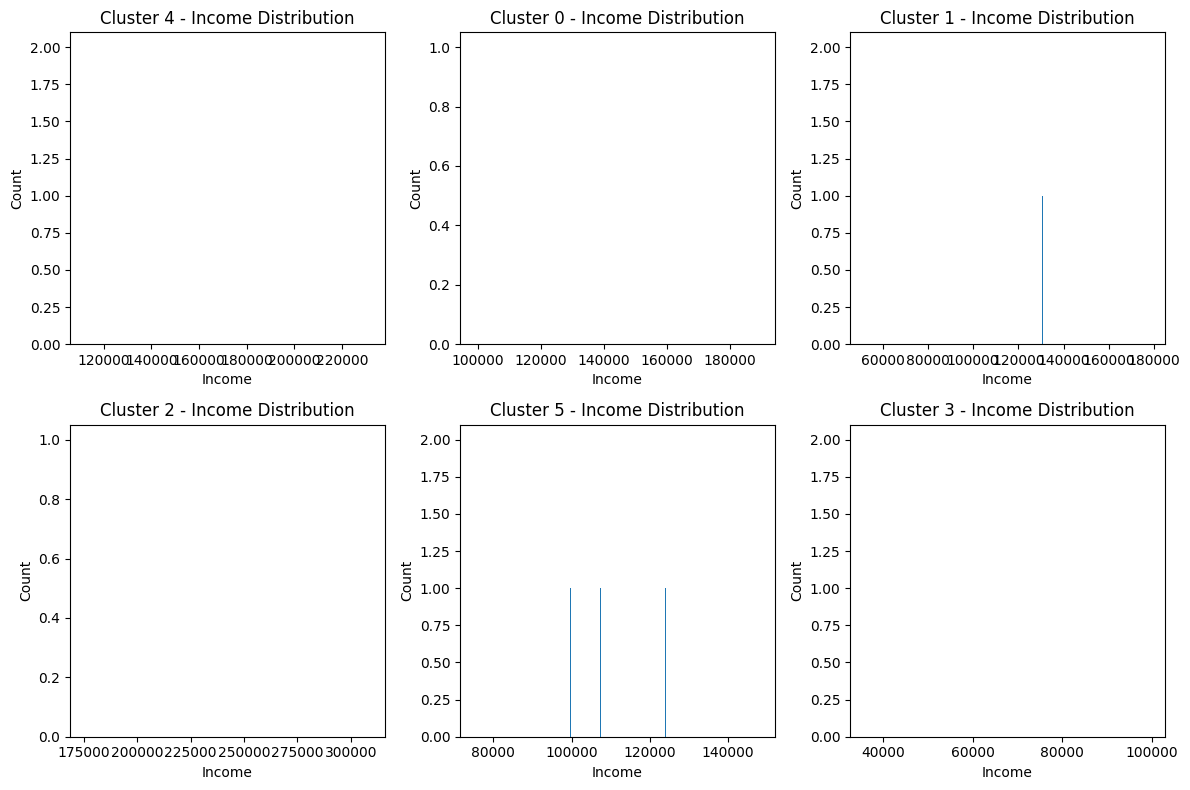

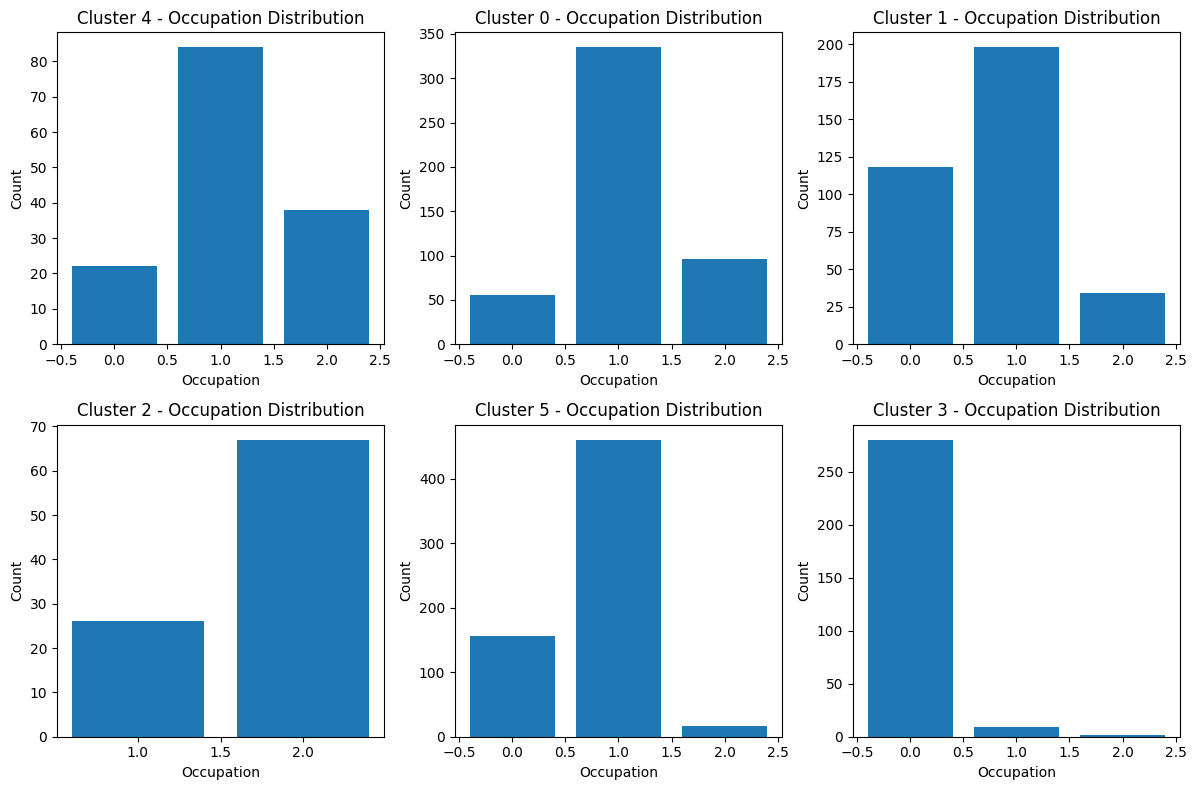

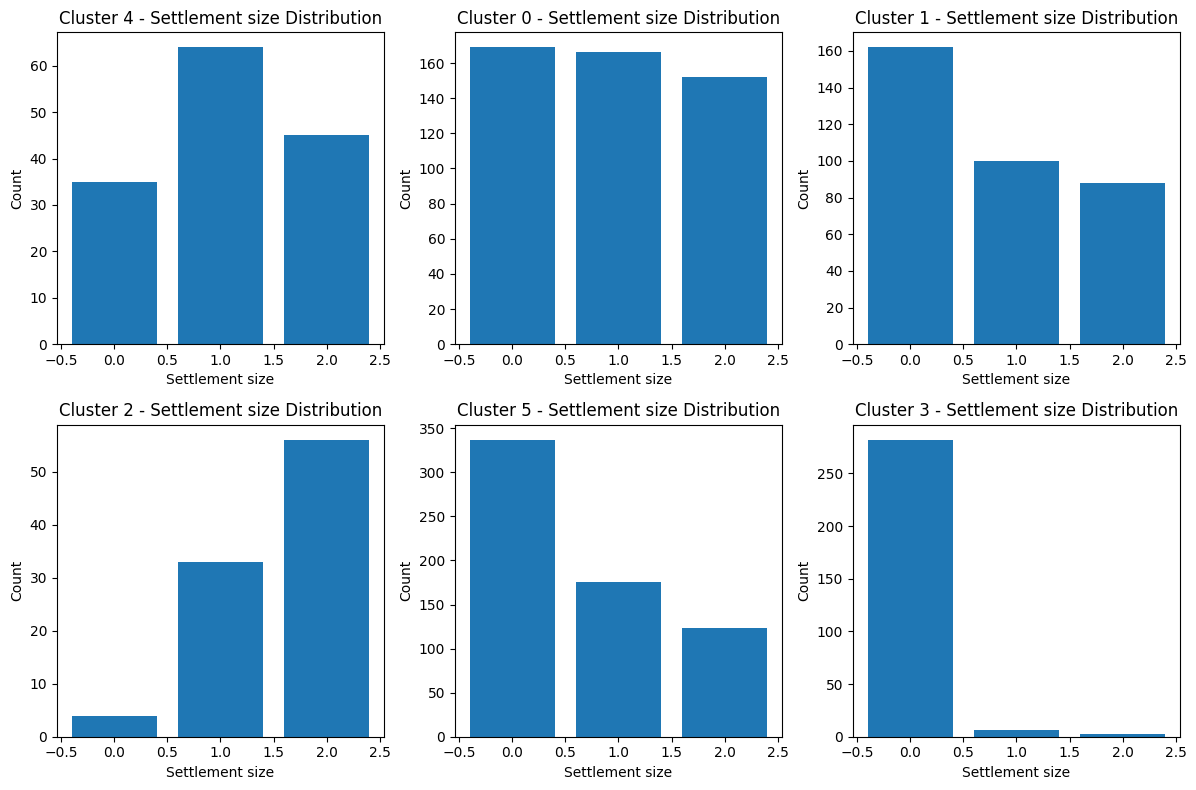

In [29]:

visual['Cluster'] = y_pred
unique_clusters = visual['Cluster'].unique()

num_clusters = len(unique_clusters)
num_columns = len(visual.columns[1:-1])

subplots_per_row = 3


num_rows = (num_clusters + subplots_per_row - 1) // subplots_per_row# floor division

# Iterate over each column (excluding 'ID' and 'Cluster')
for column in visual.columns[1:-1]:
    # Create a figure with subplots in a 1x3 grid (three plots in a row)
    fig, axes = plt.subplots(num_rows, subplots_per_row, figsize=(12, 4 * num_rows))

    for i, cluster in enumerate(unique_clusters):
        ax = axes[i // subplots_per_row, i % subplots_per_row]
        cluster_data = visual[visual['Cluster'] == cluster]# fetches only data points that belong to particular cluster
        
        # Get the counts of each unique value in the column for the current cluster
        value_counts = cluster_data[column].value_counts()
        
        # Plot a bar chart showing the counts of each unique value
        ax.bar(value_counts.index, value_counts)
        ax.set_xlabel(column)
        ax.set_ylabel('Count')
        ax.set_title(f'Cluster {cluster} - {column} Distribution')

    plt.tight_layout()
    plt.show()


# Summary

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#000000;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 15px;
              color:white;">
               Cluster 0

</p>
</div>



* Sex (Gender) : Females are more than males
* Marital Status : Singles are higher than Non-single
* Age : 30 to 40 Age
* Education : Under graduates
* Income : 100k to 180k Income
* Occupation : Employed 
* City Size : Small City > Med City > Large City

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#000000;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 15px;
              color:white;">
               Cluster 1

</p>
</div>



* Sex (Gender) : Females are more than males
* Marital Status : Singles are higher than Non-single
* Age : 40 to 50 Age
* Education : Under graduates
* Income : 120k to 140k Income
* Occupation : Employed and Unemployed 
* City Size : Small City

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#000000;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 15px;
              color:white;">
               Cluster 2

</p>
</div>



* Sex (Gender) : Females are more than males
* Marital Status : Singles are higher than Non-single
* Age : 40 to 50 Age
* Education : Under graduates and Post Graduates 
* Income : 175k to 300k Income
* Occupation : Highly Employed 
* City Size : Large and Medium size City

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#000000;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 15px;
              color:white;">
               Cluster 3

</p>
</div>



* Sex (Gender) : Females and Males Almost Equal
* Marital Status : Singles are higher than Non-single
* Age : 20 to 40 Age
* Education : Under graduates
* Income : 40k to 100k Income
* Occupation : Unemployed 
* City Size : Small City

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#000000;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 15px;
              color:white;">
               Cluster 4

</p>
</div>



* Sex (Gender) : Females are more than males
* Marital Status : Singles and Non-singles almost equal count
* Age : 50 to 70 Age
* Education : Post graduates
* Income : 120k to 220k Income
* Occupation : Employed and Highly Employed 
* City Size : Med City > Large City > Small City

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#000000;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 15px;
              color:white;">
               Cluster 5

</p>
</div>



* Sex (Gender) : Males are more than Females
* Marital Status : Non-Singles are higher than Singles
* Age : 20 to 30 Age
* Education : Under graduates
* Income : 100k to 130k Income
* Occupation : Employed 
* City Size : Small City > Med City > Large City

**Thank you**


**Check Discussion**